## Name : Kurapati Pavankumar

### Installing the necessary dependencies

In [1]:
pip install pandas requests beautifulsoup4


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Import the necessary dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read the datasets

In [3]:
movies = pd.read_csv("movies.csv")

In [4]:
ratings = pd.read_csv("ratings.csv")

In [5]:
tags = pd.read_csv("tags.csv")

In [6]:
links = pd.read_csv("links.csv")

In [7]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [10]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


### What is the shape of "movies.csv"?
 

In [11]:
movies.shape

(9742, 3)

### What is the shape of "ratings.csv"?


In [12]:
ratings.shape

(100836, 4)

### How many unique "userId" are available in "ratings.csv"?
 

In [13]:
# Count the number of unique userIds
unique_user_count = ratings['userId'].nunique()

print(f'The number of unique userIds is: {unique_user_count}')

The number of unique userIds is: 610


### Select all the correct tags submitted by users to "Matrix, The (1999)" movie? 

In [14]:
# Find the movieId for "Matrix, The (1999)"
matrix_movie_id = movies[movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]

# Filter tags by the movieId for "Matrix, The (1999)"
matrix_tags = tags[tags['movieId'] == matrix_movie_id]

# Display the unique tags
unique_tags = matrix_tags['tag'].unique()
print(f'Tags for "Matrix, The (1999)": {unique_tags}')

Tags for "Matrix, The (1999)": ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


### Which movie has recieved maximum number of user ratings?

In [15]:
# Count the number of ratings for each movie
ratings_count = ratings.groupby('movieId').size()

# Find the movieId with the maximum ratings
max_ratings_movieId = ratings_count.idxmax()
max_ratings_count = ratings_count.max()

# Load the movies.csv file to find the title corresponding to the movieId
movie_title_with_max_ratings = movies[movies['movieId'] == max_ratings_movieId]['title'].values[0]

print(f'The movie with the maximum number of ratings is "{movie_title_with_max_ratings}" with {max_ratings_count} ratings.')

The movie with the maximum number of ratings is "Forrest Gump (1994)" with 329 ratings.


### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [16]:
#find the movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie_id = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

# Filter the ratings for the movieId corresponding to "Terminator 2: Judgment Day (1991)"
terminator_ratings = ratings[ratings['movieId'] == terminator_movie_id]

# Calculate the average rating
average_rating = terminator_ratings['rating'].mean()

print(f'The average user rating for "Terminator 2: Judgment Day (1991)" is {average_rating:.2f}.')

The average user rating for "Terminator 2: Judgment Day (1991)" is 3.97.


### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

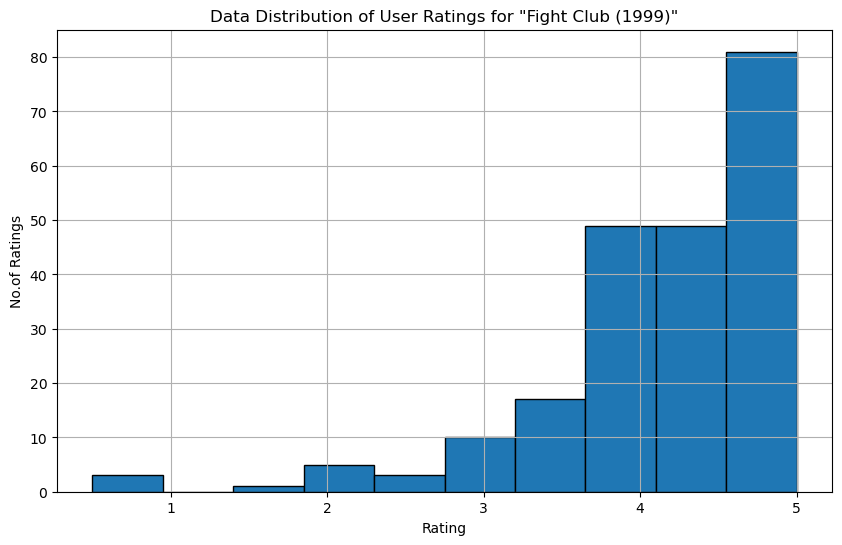

In [17]:
# find the movieId for "Fight Club (1999)"

fight_club_movie_id = movies[movies['title'] == 'Fight Club (1999)']['movieId'].values[0]

# Filter the ratings for the movieId corresponding to "Fight Club (1999)"
fight_club_ratings = ratings[ratings['movieId'] == fight_club_movie_id]

# Plot a histogram to visualize the distribution of ratings
plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings['rating'], bins=10, edgecolor='black')
plt.title('Data Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('No.of Ratings')
plt.grid(True)
plt.show()

### Applied the Mandatory Operations

In [18]:
# Step 1: group by movieId
grouped_ratings = ratings.groupby('movieId').agg(rating_count=('rating', 'count'), rating_mean=('rating', 'mean')).reset_index()

# Step 2: perform an inner join
merged_df = pd.merge(movies, grouped_ratings, on='movieId', how='inner')

# Step 3: Filter only those movies with more than 50 user ratings
filtered_movies = merged_df[merged_df['rating_count'] > 50]

# Display the filtered movies
print(filtered_movies.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
5                        Action|Crime|Thriller           102     3.946078  
6                               Comedy|Romance            54     3.185185  


In [19]:
filtered_movies.shape

(436, 5)

### Which movie is the most popular based on  average user ratings?


In [20]:
# Sort the filtered movies by the mean rating in descending order
most_popular_movie = filtered_movies.sort_values(by='rating_mean', ascending=False).head(5)

print(most_popular_movie[['title', 'rating_mean']])

                                                  title  rating_mean
277                    Shawshank Redemption, The (1994)     4.429022
659                               Godfather, The (1972)     4.289062
2224                                  Fight Club (1999)     4.272936
974                               Cool Hand Luke (1967)     4.271930
602   Dr. Strangelove or: How I Learned to Stop Worr...     4.268041


### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [21]:
# Sort the filtered movies by the rating count in descending order
top_5_movies = filtered_movies.sort_values(by='rating_count', ascending=False).head(5)

print(top_5_movies[['title', 'rating_count']])

                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [22]:
# Sci-Fi movies (assuming genres column exists)
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]

# Sort by rating count in descending order and get the third most popular movie
third_most_popular_sci_fi = sci_fi_movies.sort_values(by='rating_count', ascending=False).iloc[2]

print(third_most_popular_sci_fi[['title', 'rating_count']])

title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


### Scraping

In [23]:
# Assume `filtered_movies` is the DataFrame with movies having more than 50 ratings
merged_links = pd.merge(filtered_movies, links, on='movieId', how='inner')

# Display the merged DataFrame
print(merged_links[['title', 'imdbId']].head())



                     title  imdbId
0         Toy Story (1995)  114709
1           Jumanji (1995)  113497
2  Grumpier Old Men (1995)  113228
3              Heat (1995)  113277
4           Sabrina (1995)  114319


In [24]:
merged_links.head()

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0


In [25]:
merged_links.shape

(436, 7)

In [26]:
import requests
from bs4 import BeautifulSoup
import time

# Function to scrape IMDb reviews and store them in a DataFrame
def scrape_and_store_imdb_reviews(imdb_id, max_reviews=10):
    reviews = []
    url = f"https://www.imdb.com/title/tt{imdb_id}/reviews"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36"
    }

    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print(f"Failed to retrieve page for IMDb ID: {imdb_id}")
        return

    soup = BeautifulSoup(response.text, 'html.parser')
    review_divs = soup.find_all('div', class_='text show-more__control')

    for review in review_divs[:max_reviews]:
        reviews.append(review.get_text(strip=True))

    # Add the reviews to the global DataFrame
    movies_reviews_df.loc[len(movies_reviews_df)] = [imdb_id, reviews]
    
    time.sleep(1)  # Pause to avoid getting blocked by IMDb

# Initialize an empty DataFrame to store the reviews
movies_reviews_df = pd.DataFrame(columns=['imdbId', 'reviews'])

# Loop over each movie in the merged_links DataFrame (filtered movies with IMDb IDs)
for idx, row in merged_links.iterrows():
    movie_title = row['title']
    imdb_id = str(row['imdbId']).zfill(7)  # Ensure imdbId is 7 digits long
    print(f"Scraping reviews for {movie_title} (IMDb ID: {imdb_id})...")
    
    # Scrape and store reviews directly in the DataFrame
    scrape_and_store_imdb_reviews(imdb_id)

# Display the DataFrame with scraped reviews
print(movies_reviews_df.head())


Scraping reviews for Toy Story (1995) (IMDb ID: 0114709)...
Scraping reviews for Jumanji (1995) (IMDb ID: 0113497)...
Scraping reviews for Grumpier Old Men (1995) (IMDb ID: 0113228)...
Scraping reviews for Heat (1995) (IMDb ID: 0113277)...
Scraping reviews for Sabrina (1995) (IMDb ID: 0114319)...
Scraping reviews for GoldenEye (1995) (IMDb ID: 0113189)...
Scraping reviews for American President, The (1995) (IMDb ID: 0112346)...
Scraping reviews for Casino (1995) (IMDb ID: 0112641)...
Scraping reviews for Sense and Sensibility (1995) (IMDb ID: 0114388)...
Scraping reviews for Ace Ventura: When Nature Calls (1995) (IMDb ID: 0112281)...
Scraping reviews for Get Shorty (1995) (IMDb ID: 0113161)...
Scraping reviews for Leaving Las Vegas (1995) (IMDb ID: 0113627)...
Scraping reviews for Twelve Monkeys (a.k.a. 12 Monkeys) (1995) (IMDb ID: 0114746)...
Scraping reviews for Babe (1995) (IMDb ID: 0112431)...
Scraping reviews for Dead Man Walking (1995) (IMDb ID: 0112818)...
Scraping reviews for C

In [27]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Function to fetch IMDb rating
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    
    print(f"Scraping URL: {URL}")  # Debugging output
    
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    
    try:
        response = requests.get(URL, headers=request_header)
        response.raise_for_status()  # Raise an exception for HTTP errors
        
        soup = BeautifulSoup(response.text, 'html.parser')
        imdb_rating = soup.find('span', attrs={'class': 'sc-eb51e184-1 ljxVSS'})
        
        if imdb_rating:
            return imdb_rating.text.strip()
        else:
            print(f"Could not find rating for {URL}")
            return None
    
    except requests.RequestException as e:
        print(f"Request failed: {e}")
        return None

# Function to fetch ratings for movies in the DataFrame
def fetch_ratings_for_merged_links(merged_links):
    ratings = []
    for imdb_id in merged_links['imdbId']:  # Replace 'imdbId' with the correct column name
        rating = scrapper(imdb_id)
        ratings.append(rating)
    merged_links['imdb_rating'] = ratings
    return merged_links



# Fetch ratings and update DataFrame
merged_links_with_ratings = fetch_ratings_for_merged_links(merged_links)



Scraping URL: https://www.imdb.com/title/tt0114709/
Scraping URL: https://www.imdb.com/title/tt0113497/
Scraping URL: https://www.imdb.com/title/tt0113228/
Scraping URL: https://www.imdb.com/title/tt0113277/
Scraping URL: https://www.imdb.com/title/tt0114319/
Scraping URL: https://www.imdb.com/title/tt0113189/
Scraping URL: https://www.imdb.com/title/tt0112346/
Scraping URL: https://www.imdb.com/title/tt0112641/
Scraping URL: https://www.imdb.com/title/tt0114388/
Scraping URL: https://www.imdb.com/title/tt0112281/
Scraping URL: https://www.imdb.com/title/tt0113161/
Scraping URL: https://www.imdb.com/title/tt0113627/
Scraping URL: https://www.imdb.com/title/tt0114746/
Scraping URL: https://www.imdb.com/title/tt0112431/
Scraping URL: https://www.imdb.com/title/tt0112818/
Scraping URL: https://www.imdb.com/title/tt0112697/
Scraping URL: https://www.imdb.com/title/tt0114369/
Scraping URL: https://www.imdb.com/title/tt0114148/
Scraping URL: https://www.imdb.com/title/tt0114814/
Scraping URL

### Mention the movieId of the movie which has the highest IMDB rating

In [29]:
# Removing any non-numeric characters and converting to float
merged_links_with_ratings['imdb_rating'] = merged_links_with_ratings['imdb_rating'].str.extract('([0-9.]+)').astype(float)

# Find the movie with the highest IMDb rating
highest_rated_movie = merged_links_with_ratings.loc[merged_links_with_ratings['imdb_rating'].idxmax()]

# Get the movieId
highest_rated_movie_id = highest_rated_movie['movieId']

print(f"The movie with the highest IMDb rating has movieId: {highest_rated_movie_id}")

The movie with the highest IMDb rating has movieId: 318


In [30]:
# Find details of the movie with movieId 318
movie_details = merged_links[merged_links['movieId'] == highest_rated_movie_id]

print(movie_details)


    movieId                             title       genres  rating_count  \
53      318  Shawshank Redemption, The (1994)  Crime|Drama           317   

    rating_mean  imdbId  tmdbId  imdb_rating  
53     4.429022  111161   278.0          9.3  


### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [31]:
# Filter by genre "Sci-Fi"
sci_fi_movies = merged_links_with_ratings[merged_links_with_ratings['genres'].str.contains('Sci-Fi', case=False, na=False)]

# Find the movie with the highest IMDb rating in the Sci-Fi genre
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['imdb_rating'].idxmax()]

# Get the movieId
highest_rated_sci_fi_movie_id = highest_rated_sci_fi_movie['movieId']

print(f"The Sci-Fi movie with the highest IMDb rating has movieId: {highest_rated_sci_fi_movie_id}")

The Sci-Fi movie with the highest IMDb rating has movieId: 79132


In [32]:
# Find details of the movie with movieId 318
movie_details = merged_links[merged_links['movieId'] == highest_rated_sci_fi_movie_id]

print(movie_details)


     movieId             title  \
424    79132  Inception (2010)   

                                              genres  rating_count  \
424  Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX           143   

     rating_mean   imdbId   tmdbId  imdb_rating  
424     4.066434  1375666  27205.0          8.8  
